In [357]:
# Importing Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from cycler import cycler
from sklearn.preprocessing import MinMaxScaler

# Create a reference path for CSV file desired
csvpath = os.path.join('city_data.csv')

# Read the first CSV into DataFrame
city_df = pd.read_csv(csvpath)

csvpath = os.path.join('ride_data.csv')
ride_df = pd.read_csv(csvpath)

#Merging the two dataframes
merge_ride_df =pd.merge(ride_df,city_df,on="city",how="outer")

In [358]:
###### Bubble Plot of Ride Sharing Data #####

#Grouping the dataframe by type to perform the aggregate function on fare and ride_id
name_df=merge_ride_df.groupby(["city","type","driver_count"]).agg({'fare': pd.Series.mean, 'ride_id': pd.Series.count})

#renaming the columns
renamed_table_df = name_df.rename(columns={"ride_id":"Total Rides","fare":"Average Fare","type":"City_Type"})

#Reseting the index on grouped columns
name_bubble_index = renamed_table_df.reset_index()

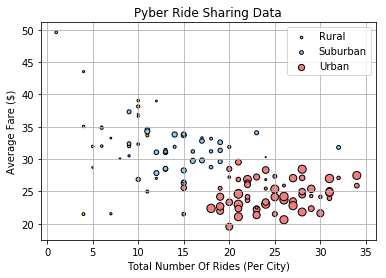

In [359]:
#Assigning x_values ,y_values, and driver_count and colors
x_values = name_bubble_index["Total Rides"]
y_values = name_bubble_index["Average Fare"]
labels = name_bubble_index["type"]
colors = ("Gold","LightSkyBlue","LightCoral")
driver_count = name_bubble_index["driver_count"]
#create a dataframe out of these
df = pd.DataFrame({'x': x_values, 'y': y_values, 'label': labels, 'driver_count': driver_count})
groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
my_colors = dict({"Rural": "Gold", "Suburban": "LightSkyBlue","Urban": "LightCoral"})

for name, group in groups:
    ax.scatter(group.x, group.y, marker='o', s = group.driver_count, color=my_colors[name], edgecolors='black', label=name)
    
#ms=group.normalized_driver_count.astype(int)
ax.legend()
ax.grid(True)
plt.title("Pyber Ride Sharing Data")
plt.xlabel("Total Number Of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.show()

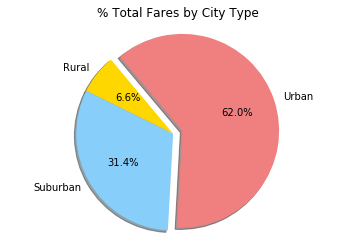

In [360]:
###  Total Fares by City Type #####

#Grouping the dataframe by type to perform the aggregate function on fare
name_df=merge_ride_df.groupby(["type"]).agg({'fare': pd.Series.sum,})

#Reseting the index on grouped columns
name_df_index = name_df.reset_index()

#assigning values to sizes
sizes=name_df_index["fare"]

#assigning values to labesls
labels=name_df_index["type"]

#Assigning colors to the pie chart
colors=("Gold","LightSkyBlue","LightCoral")

# Creating the pie chart based upon the values above
plt.pie(sizes, labels=labels, explode=(0,0,0.1),autopct="{0:2.1f}%".format, shadow=True,startangle=130,colors=colors)

# Plotting chart with equal axes
plt.axis("equal")

#naming the plot with a title 
plt.title("% Total Fares by City Type")

# Prints out pie chart to the screen
plt.show()

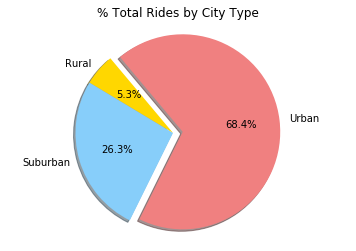

In [361]:
############Total Rides by City Type######
#Grouping the dataframe by type to perform the aggregate function on ride_id
name_df_rides=merge_ride_df.groupby(["type"]).agg({'ride_id': pd.Series.nunique,})

#Reseting the index on grouped columns
name_rides_index = name_df_rides.reset_index()

#assigning values to sizes
sizes=name_rides_index["ride_id"]

#assigning values to labels
labels=name_rides_index["type"]

#Assigning colors to the pie chart
colors=("Gold","LightSkyBlue","LightCoral")

# Creating the pie chart based upon the values above
plt.pie(sizes, labels=labels, explode=(0,0,0.1),autopct="{0:2.1f}%".format, shadow=True,startangle=130,colors=colors)

# Plotting chart with equal axes
plt.axis("equal")

#naming the plot with a title 
plt.title("% Total Rides by City Type")

# Prints out pie chart to the screen
plt.show()

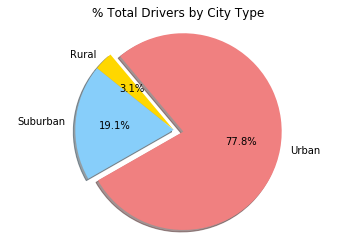

In [362]:
######### Total Drivers by City Type #####

#Grouping the dataframe by type to perform the aggregate function on driver_count
name_df_driver_count=city_df.groupby(["type"]).agg({'driver_count': pd.Series.sum,})

#Reseting the index on grouped columns
name_driver_count_index = name_df_driver_count.reset_index()

#assigning values to sizes
sizes=name_driver_count_index["driver_count"]

#assigning values to labels
labels=name_driver_count_index["type"]

#Assigning colors to the pie chart
colors=("Gold","LightSkyBlue","LightCoral")

# Creating the pie chart based upon the values above
plt.pie(sizes, labels=labels, explode=(0,0,0.1),autopct="{0:2.1f}%".format, shadow=True,startangle=130,colors=colors)

# Plotting chart with equal axes
plt.axis("equal")

#naming the plot with a title 
plt.title("% Total Drivers by City Type")

# Prints out pie chart to the screen
plt.show()